# <b> This notebook plots the frequencies of bike travels made per day of the week as histograms yearly and monthly for years 2016-2019 and the most popular stations </b>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [30]:
month = "04"
path  = f"../data/od-trips-2019/2019-{month}.csv"
april_2019_OD = pd.read_csv(path)
april_2019_OD

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.)
0,2019-04-30T23:59:35,2019-05-01T00:00:36,43,Karhupuisto,43.0,Karhupuisto,2.0,57
1,2019-04-30T23:59:31,2019-05-01T00:09:00,140,Verkatehtaanpuisto,134.0,Haukilahdenkatu,2196.0,569
2,2019-04-30T23:59:25,2019-04-30T23:59:46,121,Vilhonvuorenkatu,121.0,Vilhonvuorenkatu,0.0,20
3,2019-04-30T23:59:21,2019-05-01T00:09:20,39,Ooppera,44.0,Sörnäisten metroasema,2121.0,596
4,2019-04-30T23:59:19,2019-05-01T00:18:12,57,Lauttasaaren ostoskeskus,63.0,Jätkäsaarenlaituri,2460.0,1127
...,...,...,...,...,...,...,...,...
406675,2019-04-01T06:12:01,2019-04-01T06:31:09,35,Cygnauksenkatu,128.0,Päijänteentie,0.0,1144
406676,2019-04-01T06:08:41,2019-04-01T06:14:24,26,Kampin metroasema,64.0,Tyynenmerenkatu,1611.0,339
406677,2019-04-01T06:04:00,2019-04-01T06:17:33,86,Kuusitie,114.0,Ratapihantie,2598.0,812
406678,2019-04-01T05:53:14,2019-04-01T05:56:26,85,Jalavatie,83.0,Meilahden sairaala,479.0,190


### (Checking the most popular stations in april of 2019)

In [101]:
(april_2019_OD["Departure station name"]).value_counts()

Departure station name
Töölönlahdenkatu         8894
Itämerentori             8704
Kampin metroasema        7141
Rautatientori / länsi    5422
Rautatientori / itä      5316
                         ... 
Karhulantie                72
Kauppakartanonkuja         72
Siilitie 13                58
Workshop Helsinki          36
Workshop Konala             2
Name: count, Length: 340, dtype: int64

In [103]:
type((april_2019_OD["Departure station name"]).value_counts())

pandas.core.series.Series

In [102]:
(april_2019_OD["Return station name"]).value_counts()

Return station name
Töölönlahdenkatu         8877
Itämerentori             8605
Kampin metroasema        7088
Rautatientori / länsi    5447
Rautatientori / itä      5288
                         ... 
Prinsessantie              77
Karhulantie                75
Kauppakartanonkuja         71
Siilitie 13                56
Workshop Helsinki          45
Name: count, Length: 339, dtype: int64

In [31]:
n_rows = len(april_2019_OD)
n_rows

406680

In [32]:
datetime.strptime(april_2019_OD['Departure'][0], "%Y-%m-%dT%H:%M:%S").weekday() #converting the first recorded departure date to an int representing the
# weekday where Monday is 0 and Sunday is 6. Here the departure was made on Tuesday.

1

In [33]:
april_2019_OD['Departure'] = pd.to_datetime(april_2019_OD['Departure'], errors='coerce')
weekdays = april_2019_OD['Departure'].dt.weekday
april_2019_OD["dept_weekday"] = weekdays


In [34]:
np.unique(weekdays)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6., nan])

In [35]:
pd.isna(april_2019_OD["Departure"]).sum() #4 nan values, thats why weekdays also has nan values

np.int64(4)

In [36]:
april_2019_OD

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.),dept_weekday
0,2019-04-30 23:59:35,2019-05-01T00:00:36,43,Karhupuisto,43.0,Karhupuisto,2.0,57,1.0
1,2019-04-30 23:59:31,2019-05-01T00:09:00,140,Verkatehtaanpuisto,134.0,Haukilahdenkatu,2196.0,569,1.0
2,2019-04-30 23:59:25,2019-04-30T23:59:46,121,Vilhonvuorenkatu,121.0,Vilhonvuorenkatu,0.0,20,1.0
3,2019-04-30 23:59:21,2019-05-01T00:09:20,39,Ooppera,44.0,Sörnäisten metroasema,2121.0,596,1.0
4,2019-04-30 23:59:19,2019-05-01T00:18:12,57,Lauttasaaren ostoskeskus,63.0,Jätkäsaarenlaituri,2460.0,1127,1.0
...,...,...,...,...,...,...,...,...,...
406675,2019-04-01 06:12:01,2019-04-01T06:31:09,35,Cygnauksenkatu,128.0,Päijänteentie,0.0,1144,0.0
406676,2019-04-01 06:08:41,2019-04-01T06:14:24,26,Kampin metroasema,64.0,Tyynenmerenkatu,1611.0,339,0.0
406677,2019-04-01 06:04:00,2019-04-01T06:17:33,86,Kuusitie,114.0,Ratapihantie,2598.0,812,0.0
406678,2019-04-01 05:53:14,2019-04-01T05:56:26,85,Jalavatie,83.0,Meilahden sairaala,479.0,190,0.0


Doing the same for return dates

In [37]:
april_2019_OD['Return'] = pd.to_datetime(april_2019_OD['Return'], errors='coerce')
weekdays_rt = april_2019_OD['Return'].dt.weekday
april_2019_OD["ret_weekday"] = weekdays_rt
april_2019_OD

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.),dept_weekday,ret_weekday
0,2019-04-30 23:59:35,2019-05-01 00:00:36,43,Karhupuisto,43.0,Karhupuisto,2.0,57,1.0,2.0
1,2019-04-30 23:59:31,2019-05-01 00:09:00,140,Verkatehtaanpuisto,134.0,Haukilahdenkatu,2196.0,569,1.0,2.0
2,2019-04-30 23:59:25,2019-04-30 23:59:46,121,Vilhonvuorenkatu,121.0,Vilhonvuorenkatu,0.0,20,1.0,1.0
3,2019-04-30 23:59:21,2019-05-01 00:09:20,39,Ooppera,44.0,Sörnäisten metroasema,2121.0,596,1.0,2.0
4,2019-04-30 23:59:19,2019-05-01 00:18:12,57,Lauttasaaren ostoskeskus,63.0,Jätkäsaarenlaituri,2460.0,1127,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
406675,2019-04-01 06:12:01,2019-04-01 06:31:09,35,Cygnauksenkatu,128.0,Päijänteentie,0.0,1144,0.0,0.0
406676,2019-04-01 06:08:41,2019-04-01 06:14:24,26,Kampin metroasema,64.0,Tyynenmerenkatu,1611.0,339,0.0,0.0
406677,2019-04-01 06:04:00,2019-04-01 06:17:33,86,Kuusitie,114.0,Ratapihantie,2598.0,812,0.0,0.0
406678,2019-04-01 05:53:14,2019-04-01 05:56:26,85,Jalavatie,83.0,Meilahden sairaala,479.0,190,0.0,0.0


### Observation: Some journeys are made during midnight, so the days change between departure and return times

We can only look at the departure days for simplicity

***

## Histogram of the frequency of trips made per the day of the week
Starting off with only using data from April...

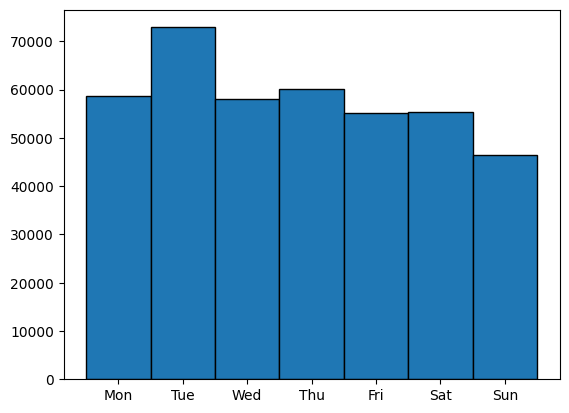

In [41]:
plt.hist(april_2019_OD["dept_weekday"].dropna(), bins=np.arange(-0.5, 7.5, 1), label='Departure Days', edgecolor="black")
labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
_ = plt.xticks(ticks=np.arange(7), labels=labels)

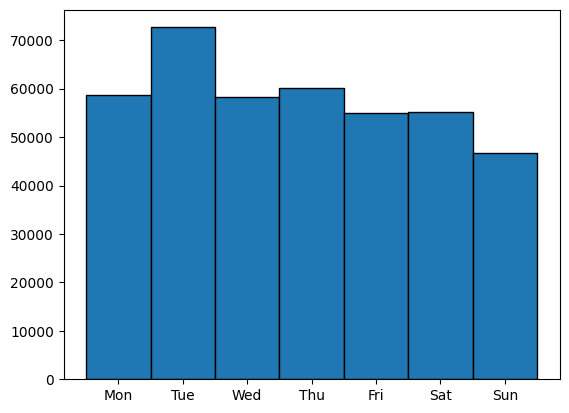

In [42]:
plt.hist(april_2019_OD["ret_weekday"], bins=np.arange(-0.5, 7.5, 1), label='Departure Days', edgecolor="black")
labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
_ = plt.xticks(ticks=np.arange(7), labels=labels)

### Looks the same as the departure histogram ^^ --> overnight journeys dont affect the data too much

### <b> Observations:</b> for April of 2019, the <b> most journeys were made on Tuesdays and the least on Sundays. </b> Around the same amount of journeys were made on the rest of the days

***

## Extending to aggregate over all months in dataset (april-october)

In [57]:
month_mapping = {"04": "april", "05": "may", "06": "june", "07": "july", "08": "august", "09": "september", "10": "october"}
aggregate = pd.DataFrame()

for key, value in month_mapping.items():
    month = key
    path  = f"../data/od-trips-2019/2019-{month}.csv"
    m = pd.read_csv(path)

    m['Departure'] = pd.to_datetime(m['Departure'], errors='coerce')
    weekdays = m['Departure'].dt.weekday
    aggregate["dept_"+value] = weekdays

    m['Return'] = pd.to_datetime(m['Return'], errors='coerce')
    weekdays_rt = m['Return'].dt.weekday
    aggregate["ret_"+value] = weekdays_rt



In [58]:
aggregate

,dept_april,ret_april,dept_may,ret_may,dept_june,ret_june,dept_july,ret_july,dept_august,ret_august,dept_september,ret_september,dept_october,ret_october
0,1.0,2.0,4.0,5.0,6.0,0.0,2.0,3.0,5.0,6.0,0.0,1.0,3.0,4.0
1,1.0,2.0,4.0,5.0,6.0,0.0,2.0,3.0,5.0,6.0,0.0,1.0,3.0,4.0
2,1.0,1.0,4.0,5.0,6.0,0.0,2.0,3.0,5.0,6.0,0.0,0.0,3.0,3.0
3,1.0,2.0,4.0,5.0,6.0,0.0,2.0,3.0,5.0,6.0,0.0,0.0,3.0,3.0
4,1.0,2.0,4.0,5.0,6.0,0.0,2.0,3.0,5.0,6.0,0.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406675,0.0,0.0,0.0,0.0,3.0,3.0,6.0,6.0,1.0,1.0,1.0,1.0,NaN,NaN
406676,0.0,0.0,0.0,0.0,3.0,3.0,6.0,6.0,1.0,1.0,1.0,1.0,NaN,NaN
406677,0.0,0.0,0.0,0.0,3.0,3.0,6.0,6.0,1.0,1.0,1.0,1.0,NaN,NaN
406678,0.0,0.0,0.0,0.0,3.0,3.0,6.0,6.0,1.0,1.0,1.0,1.0,NaN,NaN


## Plotting each month separately

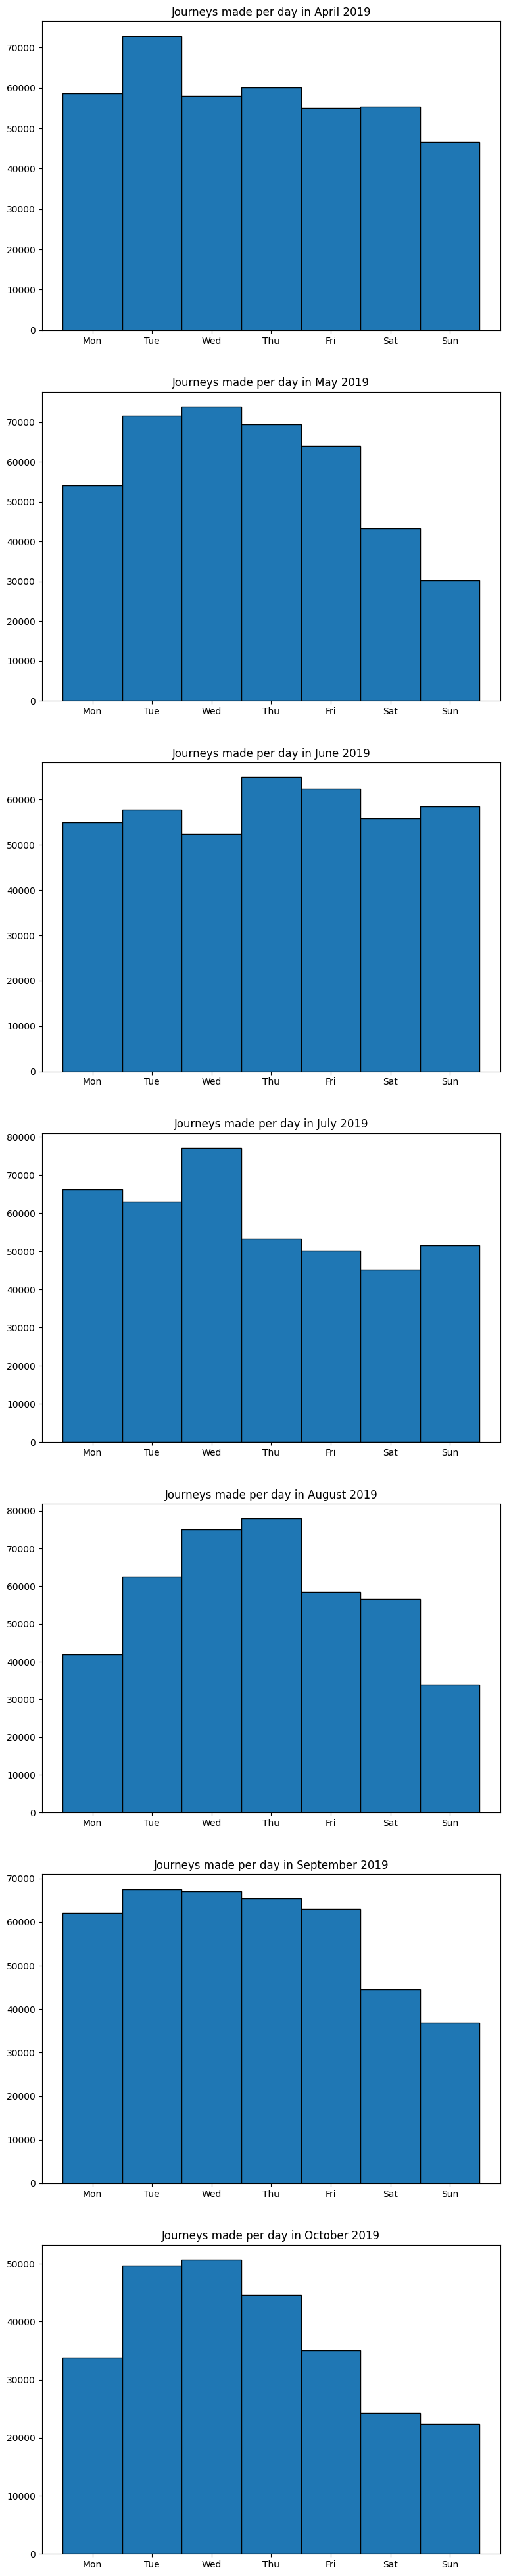

In [59]:
fig, ax = plt.subplots(7, 1, figsize=(9, 50))

for i, month in enumerate(month_mapping.values()):
    ax[i].hist(aggregate[f"dept_{month}"].dropna(), bins=np.arange(-0.5, 7.5, 1), label='Departure Days', edgecolor="black")
    labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    _ = ax[i].set_xticks(ticks=np.arange(7), labels=labels)
    ax[i].set_title(f"Journeys made per day in {month.capitalize()} 2019")

### <b> Observations: highest trips made midweek (Tue-Thu), least trips on weekends (Sat-Sun) </b>

## Plotting them aggregated all together

In [71]:
all_months = np.array(aggregate[[f"dept_{month}" for month in month_mapping.values()]].dropna()).flatten()
all_months

array([1., 4., 6., ..., 1., 2., 1.], shape=(1822625,))

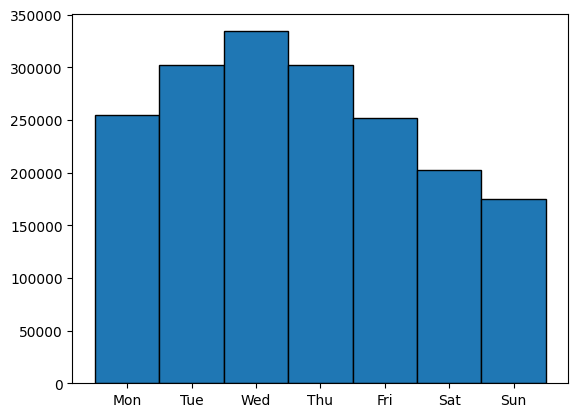

In [70]:
plt.hist(all_months, bins=np.arange(-0.5, 7.5, 1), label='Departure Days', edgecolor="black")
labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
_ = plt.xticks(ticks=np.arange(7), labels=labels)

***

## Plotting for all years

In [93]:
def form_yearly_df(year: int, num_months: int):    
    month_mapping = {"04": "april", "05": "may", "06": "june", "07": "july", "08": "august", "09": "september", "10": "october"}
    month_mapping = dict(list(month_mapping.items())[-num_months:])
    aggregate = pd.DataFrame()

    for key, value in month_mapping.items():
        month = key
        path  = f"../data/od-trips-{year}/{year}-{month}.csv"
        m = pd.read_csv(path)

        m['Departure'] = pd.to_datetime(m['Departure'], errors='coerce')
        weekdays = m['Departure'].dt.weekday
        aggregate["dept_"+value] = weekdays

    return aggregate, month_mapping


def plot_monthly(year, num_months):
    aggregate, month_mapping = form_yearly_df(year, num_months)
    fig, ax = plt.subplots(num_months, 1, figsize=(9, 50))

    for i, month in enumerate(month_mapping.values()):
        ax[i].hist(aggregate[f"dept_{month}"].dropna(), bins=np.arange(-0.5, 7.5, 1), label='Departure Days', edgecolor="black")
        labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
        _ = ax[i].set_xticks(ticks=np.arange(7), labels=labels)
        ax[i].set_title(f"Journeys made per day in {month.capitalize()} {year}")
    plt.show()

def plot_aggregated_hist(year, num_months):
    aggregate, month_mapping = form_yearly_df(year, num_months)
    all_months = np.array(aggregate[[f"dept_{month}" for month in month_mapping.values()]].dropna()).flatten()
    plt.hist(all_months, bins=np.arange(-0.5, 7.5, 1), label='Departure Days', edgecolor="black")
    labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    _ = plt.xticks(ticks=np.arange(7), labels=labels)
    plt.title(f"{year}")
    plt.show()

In [104]:
def most_popular_stations(year:int, num_months: int):
    month_mapping = {"04": "april", "05": "may", "06": "june", "07": "july", "08": "august", "09": "september", "10": "october"}
    month_mapping = dict(list(month_mapping.items())[-num_months:])
    aggregate = pd.DataFrame()

    for key, value in month_mapping.items():
        path  = f"../data/od-trips-{year}/{year}-{key}.csv"
        m = pd.read_csv(path)
        aggregate["dept_station_"+value] = (m["Departure station name"]).value_counts()
    return aggregate


***

In [117]:
pop_2019 = most_popular_stations(year=2019, num_months=7)
pop_2019.describe()

,dept_station_april,dept_station_may,dept_station_june,dept_station_july,dept_station_august,dept_station_september,dept_station_october
count,340.000000,338.000000,325.000000,326.000000,326.000000,325.000000,324.000000
mean,1196.117647,1760.260355,2020.550769,1864.779141,1923.901840,1254.184615,726.842593
std,1304.782631,1763.592184,1965.361901,1881.078341,1977.249637,1321.939109,812.507412
min,2.000000,26.000000,32.000000,8.000000,6.000000,70.000000,6.000000
25%,280.500000,538.250000,647.000000,585.000000,578.750000,370.000000,192.000000
50%,657.000000,1131.000000,1217.000000,1088.500000,1130.500000,725.000000,409.500000
75%,1686.500000,2456.250000,2795.000000,2650.500000,2675.250000,1781.000000,1003.500000
max,8894.000000,13118.000000,14148.000000,14230.000000,15984.000000,11052.000000,7156.000000


In [118]:
pop_2019.idxmax()

dept_station_april        Töölönlahdenkatu
dept_station_may          Töölönlahdenkatu
dept_station_june         Töölönlahdenkatu
dept_station_july         Töölönlahdenkatu
dept_station_august       Töölönlahdenkatu
dept_station_september    Töölönlahdenkatu
dept_station_october      Töölönlahdenkatu
dtype: object

In [119]:
pop_2019.idxmin()

dept_station_april          Workshop Konala
dept_station_may          Workshop Helsinki
dept_station_june         Workshop Helsinki
dept_station_july         Workshop Helsinki
dept_station_august       Workshop Helsinki
dept_station_september            Takomotie
dept_station_october         Diakoniapuisto
dtype: object

# <b> 2018 </b>

/tmp/ipykernel_294061/3900371615.py:9: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  m = pd.read_csv(path)


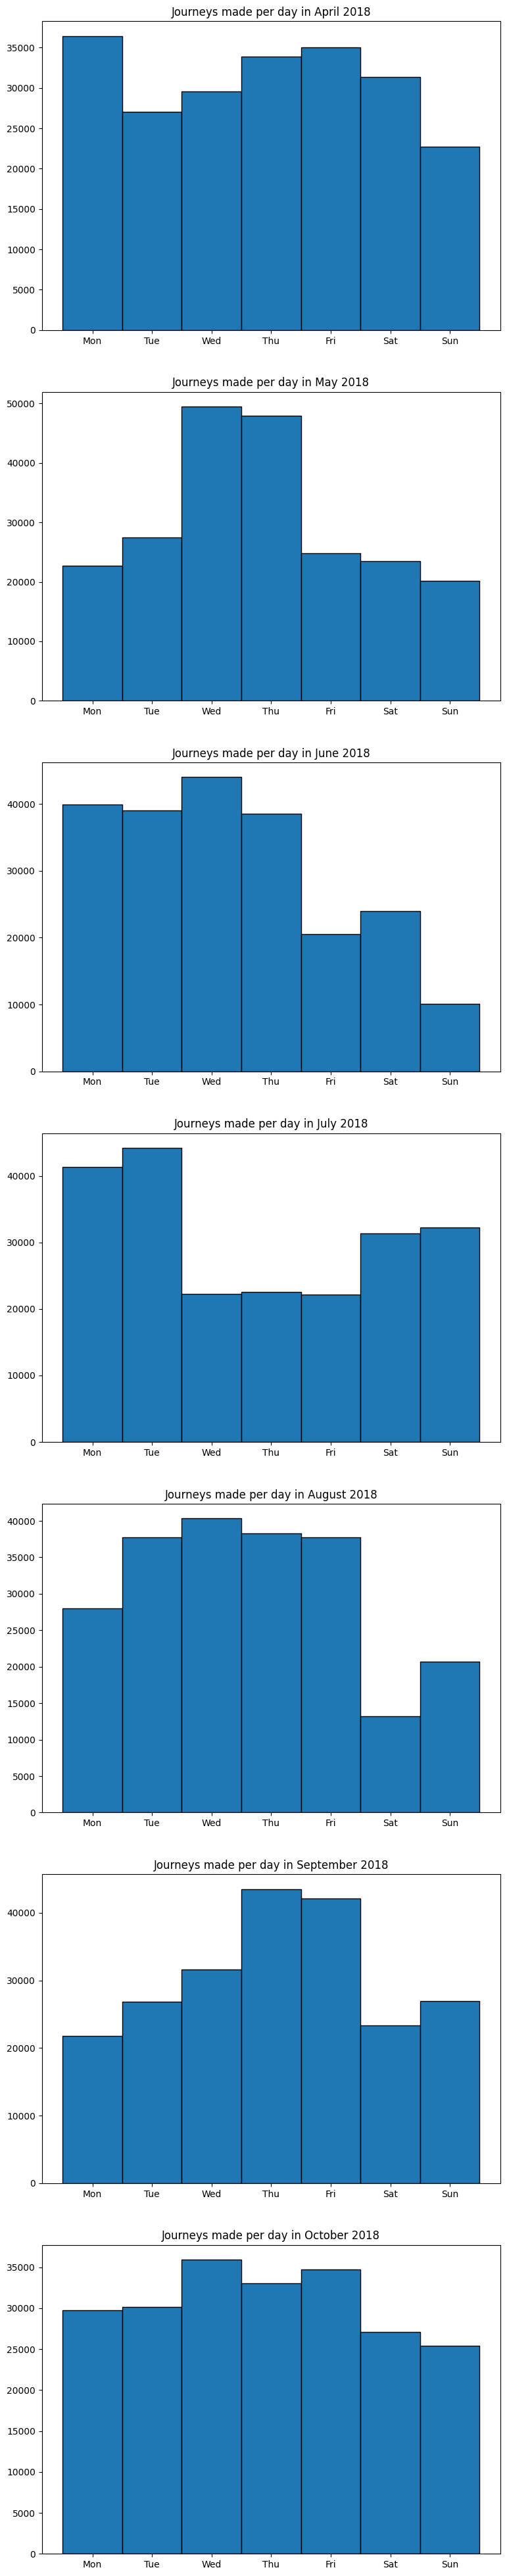

In [83]:
plot_monthly(year=2018, num_months=7)

/tmp/ipykernel_294061/1870375289.py:9: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  m = pd.read_csv(path)


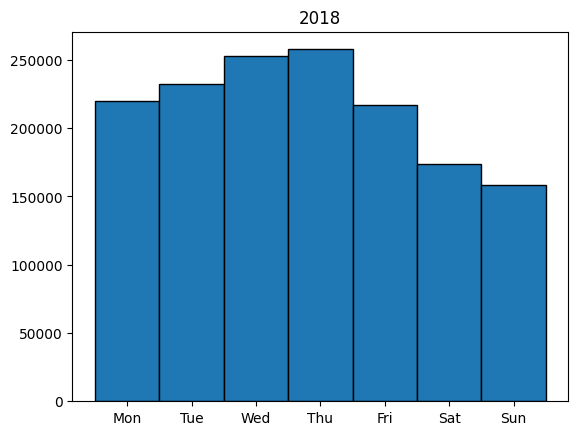

In [94]:
plot_aggregated_hist(year=2018, num_months=7)

In [ ]:
pop_2018 = most_popular_stations(year=2018, num_months=7)
pop_2018.describe()

/tmp/ipykernel_294061/1025221067.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  m = pd.read_csv(path)


,dept_station_april,dept_station_may,dept_station_june,dept_station_july,dept_station_august,dept_station_september,dept_station_october
count,154.000000,151.000000,150.000000,149.000000,149.000000,149.000000,147.000000
mean,1403.227273,3737.662252,3308.160000,3371.503356,3473.671141,2215.744966,1435.911565
std,1069.660245,2410.705766,2129.278934,2170.431682,2235.227316,1484.693731,988.241034
min,1.000000,1.000000,44.000000,125.000000,57.000000,10.000000,6.000000
25%,649.500000,2213.000000,1925.250000,1875.000000,2068.000000,1240.000000,796.500000
50%,1199.000000,3103.000000,2729.500000,2759.000000,2910.000000,1803.000000,1218.000000
75%,1866.750000,4841.000000,4175.250000,4426.000000,4559.000000,2717.000000,1825.000000
max,6277.000000,15286.000000,13456.000000,11874.000000,13625.000000,9728.000000,6442.000000


In [ ]:
pop_2018.idxmax()

dept_station_april        Itämerentori
dept_station_may          Itämerentori
dept_station_june         Itämerentori
dept_station_july         Itämerentori
dept_station_august       Itämerentori
dept_station_september    Itämerentori
dept_station_october      Itämerentori
dtype: object

In [ ]:
pop_2018.idxmin()

dept_station_april                       Jäähalli
dept_station_may           Relay Box test station
dept_station_june               Workshop Helsinki
dept_station_july               Workshop Helsinki
dept_station_august             Workshop Helsinki
dept_station_september          Workshop Helsinki
dept_station_october            Workshop Helsinki
dtype: object

***

# <b> 2017 </b>

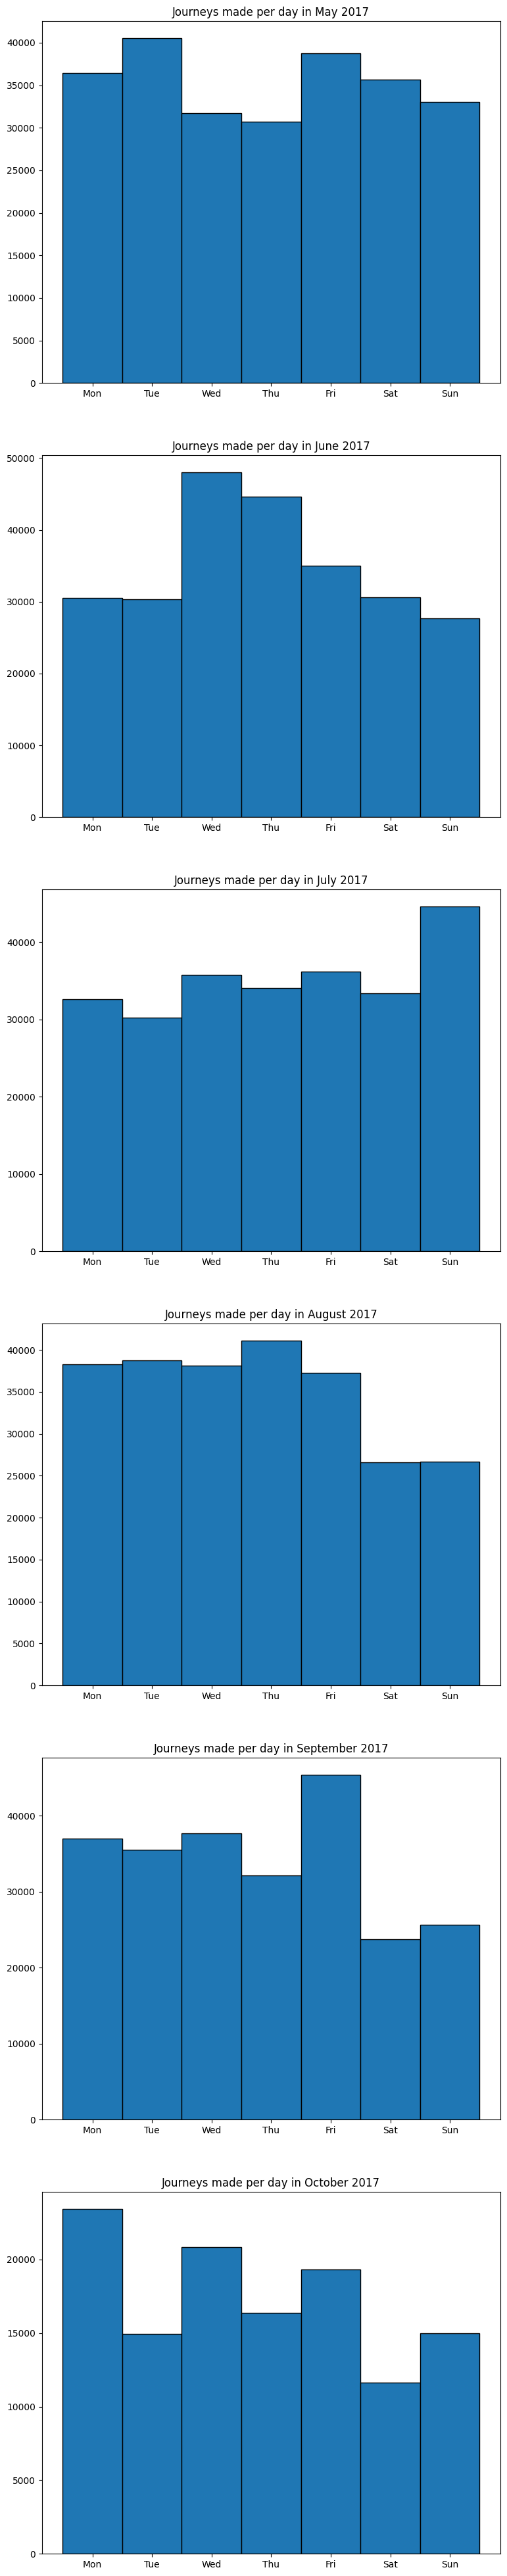

In [87]:
plot_monthly(year=2017, num_months=6)

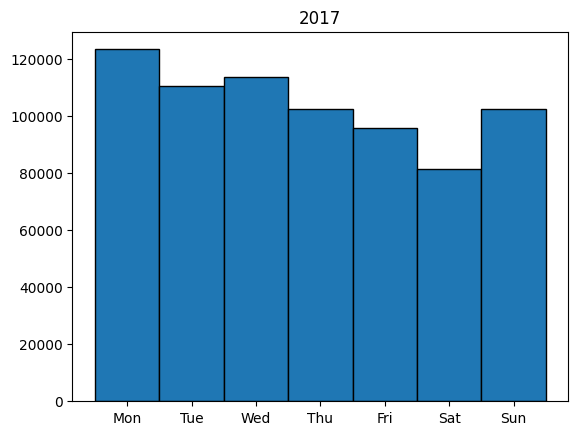

In [95]:
plot_aggregated_hist(year=2017, num_months=6)

In [116]:
pop_2017 = most_popular_stations(year=2017, num_months=6)
pop_2017.idxmax()

dept_station_may           Töölönlahdenkatu
dept_station_june          Töölönlahdenkatu
dept_station_july         Kampin metroasema
dept_station_august       Kampin metroasema
dept_station_september         Itämerentori
dept_station_october       Töölönlahdenkatu
dtype: object

In [120]:
pop_2017.idxmin()

dept_station_may          Workshop Helsinki
dept_station_june         Workshop Helsinki
dept_station_july         Workshop Helsinki
dept_station_august       Workshop Helsinki
dept_station_september        Kalastajantie
dept_station_october                Nokkala
dtype: object

***

# <b> 2016 </b>

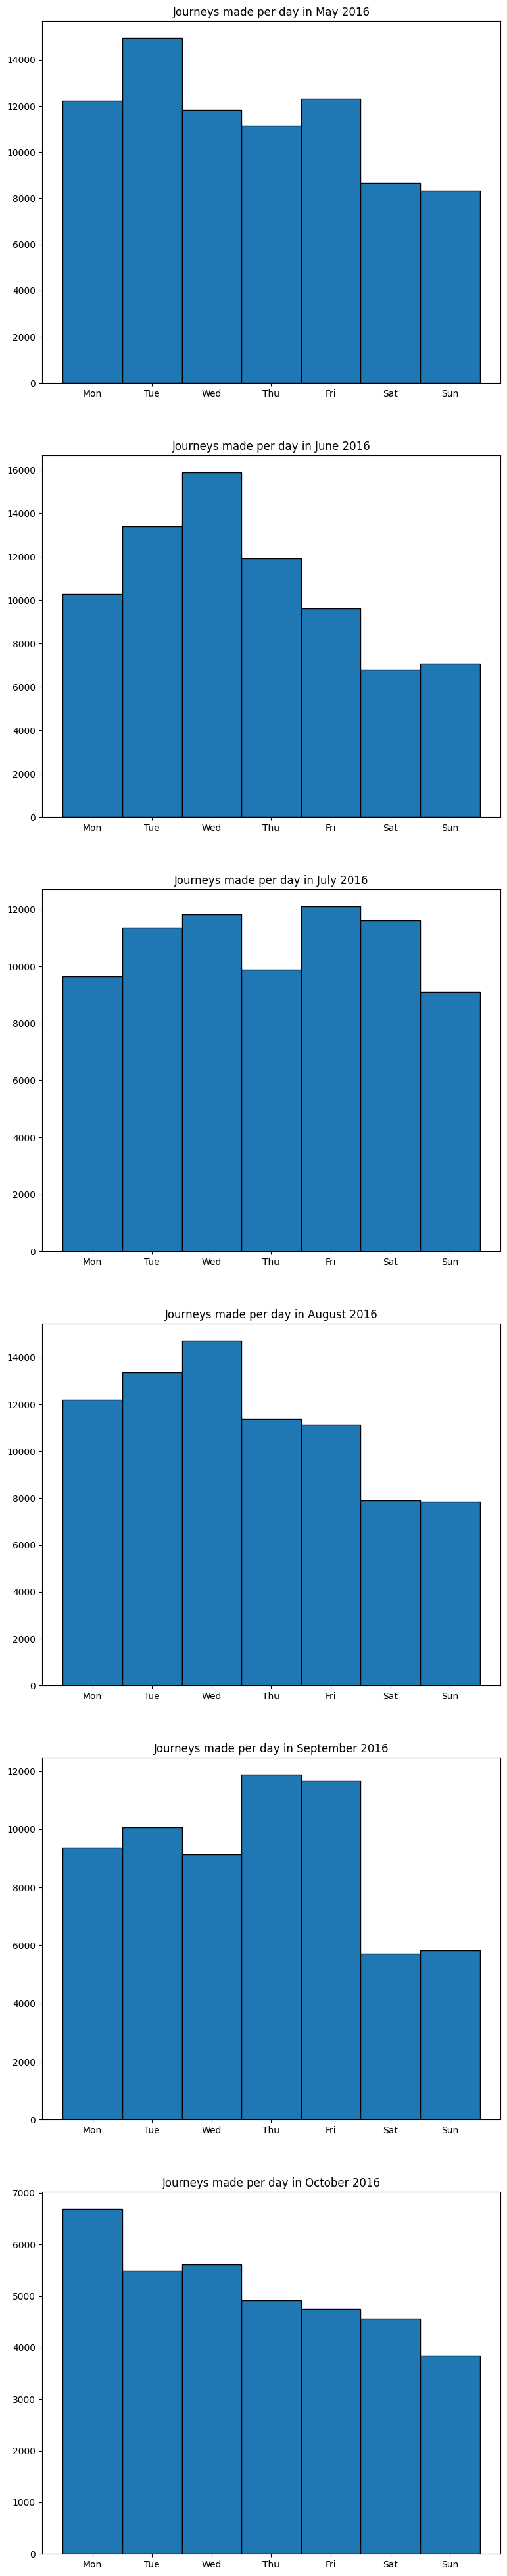

In [89]:
plot_monthly(year=2016, num_months=6)

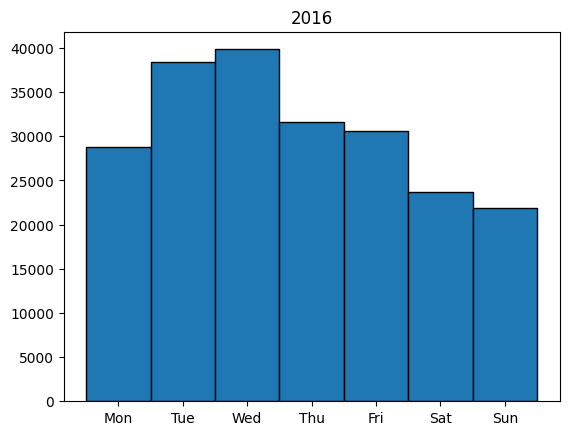

In [96]:
plot_aggregated_hist(year=2016, num_months=6)

In [121]:
pop_2016 = most_popular_stations(year=2016, num_months=6)
pop_2016.idxmax()

dept_station_may          Kampin metroasema
dept_station_june         Kampin metroasema
dept_station_july         Kampin metroasema
dept_station_august       Kampin metroasema
dept_station_september     Töölönlahdenkatu
dept_station_october      Kampin metroasema
dtype: object

In [122]:
pop_2016.idxmin()

dept_station_may          Workshop Helsinki
dept_station_june         Workshop Helsinki
dept_station_july          Merisotilaantori
dept_station_august        Merisotilaantori
dept_station_september     Merisotilaantori
dept_station_october         Kansallismuseo
dtype: object

***
# All years side-by-side

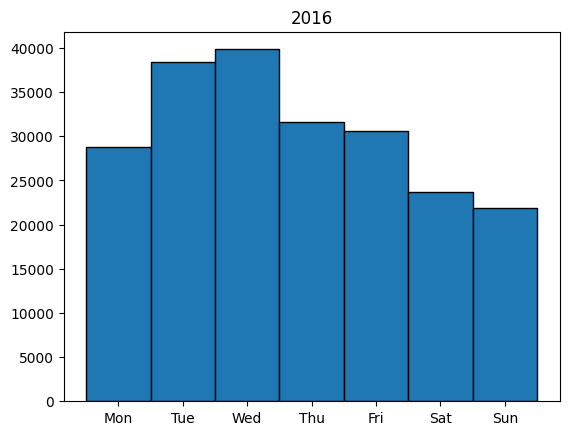

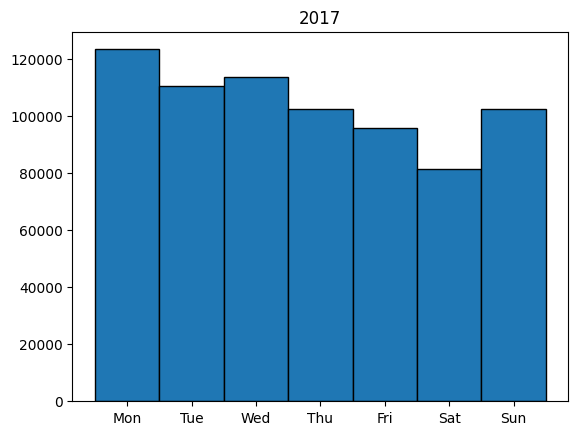

/tmp/ipykernel_294061/1870375289.py:9: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  m = pd.read_csv(path)


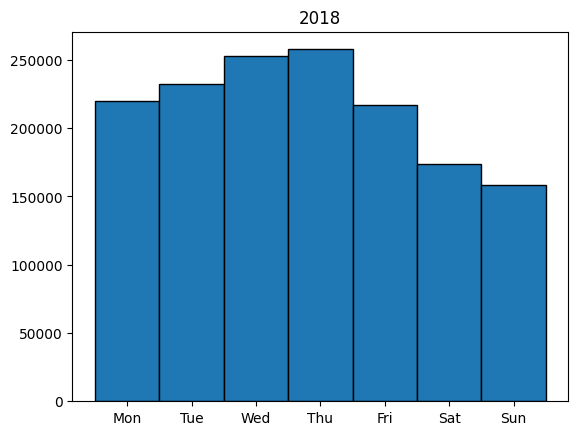

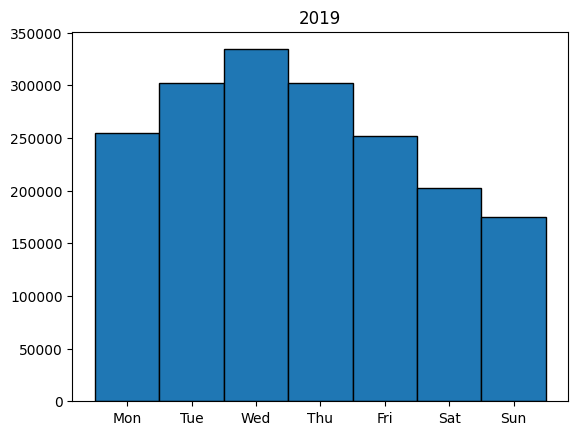

In [97]:
plot_aggregated_hist(year=2016, num_months=6)
plot_aggregated_hist(year=2017, num_months=6)
plot_aggregated_hist(year=2018, num_months=7)
plot_aggregated_hist(year=2019, num_months=7)